Вариант 6<br>

Задание 3. Задача оптимального выбора потребителя

In [73]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds
import sympy as sym

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [74]:
X, Y = sym.symbols('x y')
U = 6*(X + 5)**(0.825) * (Y - 6)**(2/3)

p, q, I = [19, 18, 1556]

def con(xy):
    x, y = xy
    return f'px + qy = {(p*x + q*y).round(3)}, I = {I}.'

def f(xy):
    x, y = xy
    return -(3 * x * (y - 7) ** 0.75)

def gr(xy):
    x, y = xy
    
    der = np.zeros_like(xy)
    der[0] = -eval(str(U.diff(xs)))
    der[1] = -eval(str(U.diff(ys)))
    
    return der

def demand(p):
    return 7748/(7*p)

print('Предельная полезность MUx (dU/dx):')
display(U.diff(xs))
print('Предельная полезность MUy (dU/dy):')
display(U.diff(ys))

x_min = 1
y_min = 7
x_max = np.inf
y_max = np.inf

linear_constraint = LinearConstraint ([p, q], -np.inf, I)
bounds = Bounds([x_min, y_min], [x_max, y_max])
x0 = np.array([10.0, 10.0])
res = minimize(f, x0, jac=gr, constraints=linear_constraint, bounds=bounds, options={'disp': True})

u = res.x[0]
v = res.x[1]

print(res.x)

print(f'Оптимальные значения: x = {u}, y = {v}')
print('Max значение функции:',-res.fun)
print(con(res.x))

ps = sym.symbols('p')
E = eval(str(demand(ps).diff(ps)))
print('Эластичность спроса E =', E)

Предельная полезность MUx (dU/dx):


4.95*(y - 6)**0.666666666666667/(x + 5)**0.175

Предельная полезность MUy (dU/dy):


4.0*(x + 5)**0.825/(y - 6)**0.333333333333333

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1807.990546877977
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 6
[39.94689227 44.27828032]
Оптимальные значения: x = 39.94689227492627, y = 44.278280317686054
Max значение функции: 1807.990546877977
px + qy = 1556.0, I = 1556.
Эластичность спроса E = -3.066086268302335


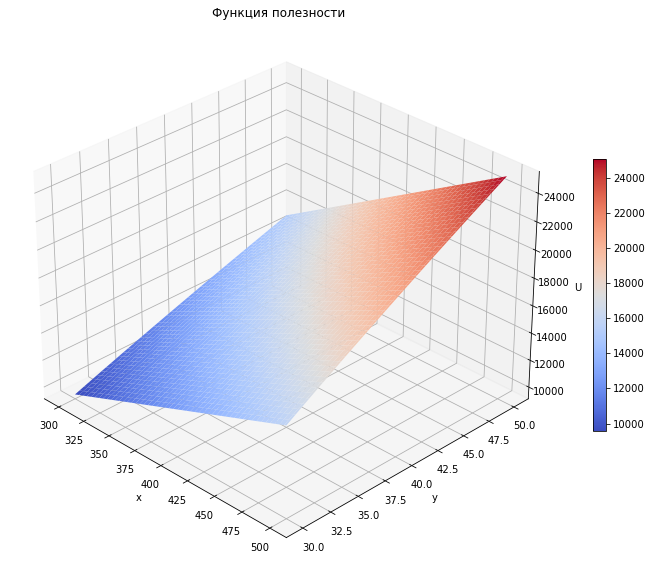

In [75]:
# Настраиваем 3D график
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})

# Задаем угол обзора
ax.view_init(30, -45)

# Создаем данные для графика

X = np.linspace(300, 500, 100)
Y = np.linspace(30, 50, 200)
X, Y = np.meshgrid(X, Y)
Z = -f(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5)
ax.set_title('Функция полезности')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U')
plt.show()

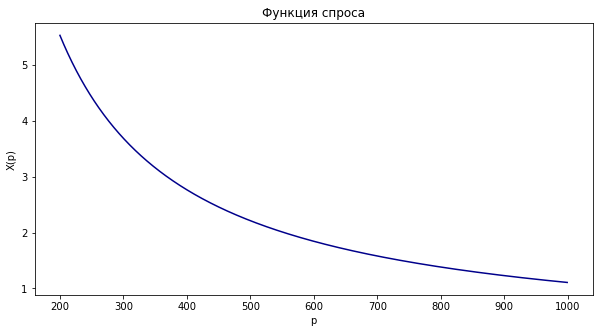

In [76]:
fig, ax = plt.subplots(figsize=(10,5))

P = np.arange(200, 1000, 1)
X = demand(P)
ax.plot(P, X, color='darkblue')
ax.set_title('Функция спроса')
ax.set_xlabel('p')
ax.set_ylabel('X(p)')

plt.show()

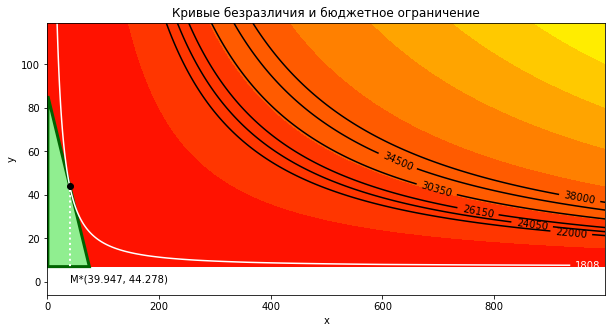

In [78]:
fig, ax = plt.subplots(figsize=(10,5))

X = np.arange(0, 1000, 1)
Y = np.arange(7, 120, 1)
X, Y = np.meshgrid(X, Y)
Z = -f(np.array([X,Y]))

ax.contourf(X, Y, Z, cmap='autumn')

adm = plt.Polygon([(x_min,y_min),(x_min, I/q-p*x_min/q),(I/p-q*y_min/p, y_min)], facecolor='lightgreen', edgecolor='darkgreen', alpha = 1, linewidth=3)
ax.add_patch(adm)

ax.set_title('Кривые безразличия и бюджетное ограничение')
ax.set_xlabel('x')
ax.set_ylabel('y')

cs_m = ax.contour(X, Y, Z, levels=[-res.fun], colors='white')
cs = ax.contour(X, Y, Z, levels=[22000,24050,26150,30350,34500,38000], colors='black')

plt.vlines(x=u, ymin=0, ymax=v, colors='white', ls=':', lw=2)
ax.plot(u, v, 'ko')
ax.text(res.x[0], 0, f'M*({u.round(3)}, {v.round(3)})')

ax.clabel(cs)
ax.clabel(cs_m)

plt.show()